In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_val_predict, StratifiedKFold

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier,
                                ExtraTreesClassifier,
                                BaggingClassifier)

from sklearn.metrics import confusion_matrix, classification_report

## Import Data

In [2]:
df_naut = pd.read_csv('../data/nlp_naut_data.csv')
df_stem = pd.read_csv('../data/nlp_stem_data.csv')
df_lemma = pd.read_csv('../data/nlp_lemma_data.csv')
df_lem_stem = pd.read_csv('../data/nlp_lem_stem_data.csv')

## Preprocessing

In [3]:
# create target column and columns we don't want in our X
target = 'target'
cols_to_skip = ['num_comments', 'num_comments_logscale', 'target']


# for each df below, create a y, X, y_test, y_train, X_test, X_train
# these train test splits are inherited from our NLP workbook
y_naut = df_naut[target]
y_naut_train = df_naut[df_naut.is_train==1][target]
y_naut_test = df_naut[df_naut.is_train==0][target]

X_naut = df_naut[[col for col in df_naut.columns if col not in cols_to_skip]]
X_naut_train = X_naut[X_naut.is_train==1]
X_naut_test = X_naut[X_naut.is_train==0]


y_stem = df_stem[target]
y_stem_train = df_stem[df_stem.is_train==1][target]
y_stem_test = df_stem[df_stem.is_train==0][target]

X_stem = df_stem[[col for col in df_stem.columns if col not in cols_to_skip]]
X_stem_train = X_stem[X_stem.is_train==1]
X_stem_test = X_stem[X_stem.is_train==0]


y_lemma = df_lemma[target]
y_lemma_train = df_lemma[df_lemma.is_train==1][target]
y_lemma_test = df_lemma[df_lemma.is_train==0][target]

X_lemma = df_lemma[[col for col in df_lemma.columns if col not in cols_to_skip]]
X_lemma_train = X_lemma[X_lemma.is_train==1]
X_lemma_test = X_lemma[X_lemma.is_train==0]


y_lem_stem = df_lem_stem[target]
y_lem_stem_train = df_lem_stem[df_lem_stem.is_train==1][target]
y_lem_stem_test = df_lem_stem[df_lem_stem.is_train==0][target]

X_lem_stem = df_lem_stem[[col for col in df_lem_stem.columns if col not in cols_to_skip]]
X_lem_stem_train = X_lem_stem[X_lem_stem.is_train==1]
X_lem_stem_test = X_lem_stem[X_lem_stem.is_train==0]

In [4]:
# remove is_train from all of the X's
[i.drop('is_train', axis=1, inplace=True) for i in\
    [X_naut,X_naut_train,X_naut_test,X_stem,X_stem_train,X_stem_test,
     X_lemma,X_lemma_train,X_lemma_test,X_lem_stem,X_lem_stem_train,
     X_lem_stem_test]];

C:\Users\Larry\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [5]:
# initialize standard scaler
ss = StandardScaler()

# for each ss below, fit on the train portion
# drop is_train from our X dataframe
# transform a X_ss dataframe

ss.fit(X_naut_train)
X_naut_ss = ss.transform(X_naut)
X_naut_train_ss = ss.transform(X_naut_train)
X_naut_test_ss = ss.transform(X_naut_test)

ss.fit(X_stem_train)
X_stem_ss = ss.transform(X_stem)
X_stem_train_ss = ss.transform(X_stem_train)
X_stem_test_ss = ss.transform(X_stem_test)

ss.fit(X_lemma_train)
X_lemma_ss = ss.transform(X_lemma)
X_lemma_train_ss = ss.transform(X_lemma_train)
X_lemma_test_ss = ss.transform(X_lemma_test)

ss.fit(X_lem_stem_train)
X_lem_stem_ss = ss.transform(X_lem_stem)
X_lem_stem_train_ss = ss.transform(X_lem_stem_train)
X_lem_stem_test_ss = ss.transform(X_lem_stem_test)

**Note** Creating standard-scaled versions of the X dataframes is a critical step for our logistic regression and k-nearest neighbors models.

## Model and Data Selection

To help decide which dataset to use and which models to look at, run each of the 4 datasets against 6 classification models with basic configuration.

In [6]:
# Create helper functions for evaluating our models
def print_scores(scores):
    print('Score: {:.2f} +- {:.2f}'.format(scores.mean(), 2*scores.std()), end = '     ')
    print('min: {:.2f}, max: {:.2f}'.format(min(scores),max(scores)))

def master_comparison_list(X, X_ss, y):
    
    logit = LogisticRegression(n_jobs = -1,)
    scores = cross_val_score(logit, X_ss, y)
    print('Logit', end = '            ')
    print_scores(scores)
    
    knn = KNeighborsClassifier(n_jobs = -1)
    scores = cross_val_score(knn, X_ss, y)
    print('\nKNN', end = '              ')
    print_scores(scores)
    
    dt = DecisionTreeClassifier()
    scores = cross_val_score(dt, X, y)
    print('\nDecision Tree', end = '    ')
    print_scores(scores)
   
    bdt = BaggingClassifier(dt,
                            n_jobs = -1)
    scores = cross_val_score(bdt, X, y)
    print('\nBagging', end = '          ')
    print_scores(scores)

    rf = RandomForestClassifier(n_jobs = -1)
    scores = cross_val_score(rf, X, y)
    print('\nRandom Forest', end = '    ')
    print_scores(scores)
    
    et = ExtraTreesClassifier(n_jobs = -1)
    scores = cross_val_score(et, X, y)
    print('\nExtra Trees', end = '      ')
    print_scores(scores)

In [7]:
master_comparison_list(X_naut, X_naut_ss, y_naut)

Logit            Score: 0.68 +- 0.02     min: 0.67, max: 0.69

KNN              Score: 0.58 +- 0.03     min: 0.56, max: 0.61

Decision Tree    Score: 0.63 +- 0.02     min: 0.62, max: 0.65

Bagging          Score: 0.68 +- 0.03     min: 0.66, max: 0.70

Random Forest    Score: 0.70 +- 0.02     min: 0.69, max: 0.72

Extra Trees      Score: 0.67 +- 0.03     min: 0.66, max: 0.70


In [8]:
master_comparison_list(X_stem, X_stem_ss, y_stem)

Logit            Score: 0.68 +- 0.02     min: 0.67, max: 0.70

KNN              Score: 0.57 +- 0.03     min: 0.55, max: 0.59

Decision Tree    Score: 0.63 +- 0.02     min: 0.61, max: 0.65

Bagging          Score: 0.68 +- 0.01     min: 0.68, max: 0.69

Random Forest    Score: 0.70 +- 0.03     min: 0.68, max: 0.72

Extra Trees      Score: 0.68 +- 0.03     min: 0.66, max: 0.71


In [9]:
master_comparison_list(X_lemma, X_lemma_ss, y_lemma)

Logit            Score: 0.68 +- 0.02     min: 0.67, max: 0.70

KNN              Score: 0.57 +- 0.03     min: 0.56, max: 0.59

Decision Tree    Score: 0.63 +- 0.01     min: 0.62, max: 0.64

Bagging          Score: 0.67 +- 0.03     min: 0.66, max: 0.70

Random Forest    Score: 0.70 +- 0.02     min: 0.69, max: 0.72

Extra Trees      Score: 0.67 +- 0.04     min: 0.65, max: 0.70


In [10]:
master_comparison_list(X_lem_stem, X_lem_stem_ss, y_lem_stem)

Logit            Score: 0.68 +- 0.02     min: 0.67, max: 0.70

KNN              Score: 0.57 +- 0.02     min: 0.56, max: 0.59

Decision Tree    Score: 0.63 +- 0.01     min: 0.62, max: 0.65

Bagging          Score: 0.69 +- 0.02     min: 0.67, max: 0.70

Random Forest    Score: 0.70 +- 0.03     min: 0.68, max: 0.72

Extra Trees      Score: 0.68 +- 0.04     min: 0.66, max: 0.71


The above scorings indicate that under default configuration and regardless of dataframe:
  *  KNN performs the worst
  *  Logistic Regression (Logit) is the 2nd or 3rd most accurate model
  *  Random Forest outperfoms Extra Trees, Bagging, and Decision Trees

Based on the above, **Random Forest** and **Logit** will be further explored. Logit is selected above the models it tied with because of its better interpretability of coefficients.

The above scorings also indicate that under default configuration:
  *  All dataframes score very close to one another
  *  All 4 dataframes score the same for Logit
  *  The lemma dataframe slightly performs with less variability for Random Forest

Based on this, **lemma** dataframe will be considered during further exploration. Another advantage is that it is easier to understand the type of words after lemmatization than it is after stemming.

## Modelling

### Baseline

In [11]:
df_lemma.target.value_counts(normalize=True)

0    0.504554
1    0.495446
Name: target, dtype: float64

**Observation**
The baseline for our model will be 50.45%. Given our scores in the above section, the data discovered during EDA and NLP should be sufficient to begin to answer the question.

### Logit Variable Selection via Lasso

In this phase, fit Logistic Regression CV using a Lasso penalty to find optimal features

In [12]:
# initialize and fit logit CV on our train data
logit_cv = LogisticRegressionCV(penalty='l1',
                                solver = 'liblinear',
                                n_jobs = -1,
                                random_state=21)

logit_cv.fit(X_lemma_train_ss, y_lemma_train)

LogisticRegressionCV(n_jobs=-1, penalty='l1', random_state=21,
                     solver='liblinear')

In [13]:
print("Best C: ", logit_cv.C_[0])
print("Score: ",logit_cv.score(X_lemma_ss, y_lemma))

Best C:  0.046415888336127774
Score:  0.6840121453250968


The Logistic Regression CV identifies the best C to use in our logit as 0.0464. Using this value, it achieved an accuracy of 68.40% ... fit that below to find optimal features.

In [14]:
# fit a logistic regression with the best C identified above
logit = LogisticRegression(penalty='l1',
                           solver = 'liblinear',
                           C = logit_cv.C_[0])

logit.fit(X_lemma_train_ss, y_lemma_train)

LogisticRegression(C=0.046415888336127774, penalty='l1', solver='liblinear')

In [15]:
# Get columns from lasso feature selection, coef will be != 0 if it is still relevant
final_columns_lasso = [col for col, coef in zip(X_lemma.columns, logit.coef_[0]) if coef]
len(final_columns_lasso)

87

**Observation** We have gone from 240 variables down to 87.

In [16]:
# instantiate logistic regression with our identified final columns
logit = LogisticRegression(n_jobs=-1)

scores = cross_val_score(logit, pd.DataFrame(X_lemma_ss, columns = X_lemma.columns)[final_columns_lasso], y_lemma)
print_scores(scores)

Score: 0.68 +- 0.01     min: 0.68, max: 0.69


**Observation** Recall that our original Logit score before LassoCV was<br><br>
Score: 0.68 +- 0.02     min: 0.67, max: 0.70<br><br>
No movement

In [17]:
# fit logistic regression to get coefficients for interpretation
logit.fit(pd.DataFrame(X_lemma_train_ss, columns = X_lemma.columns)[final_columns_lasso], y_lemma_train)

LogisticRegression(n_jobs=-1)

In [18]:
coef_list = pd.Series(logit.coef_[0],
                      index = pd.DataFrame(X_lemma_train_ss, columns = X_lemma.columns)[final_columns_lasso].columns)

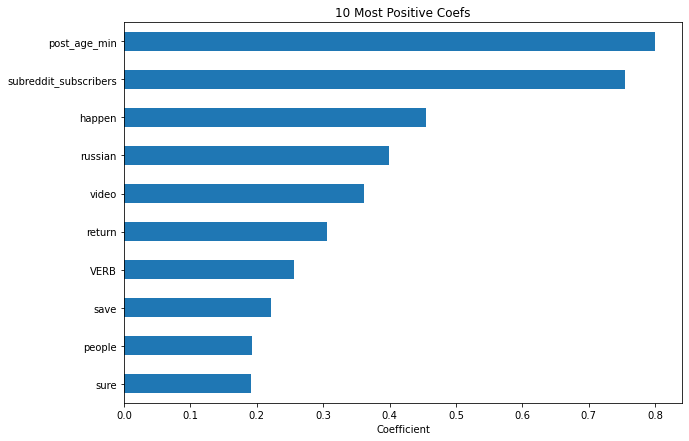

In [19]:
# look at 10 Most Positive Coefs
my_series = coef_list.sort_values(ascending=False)[:10].sort_values()

fig, ax = plt.subplots(1,1,figsize = (10,7))
ax = my_series.plot(kind='barh', title = '10 Most Positive Coefs')
ax.set_xlabel('Coefficient');

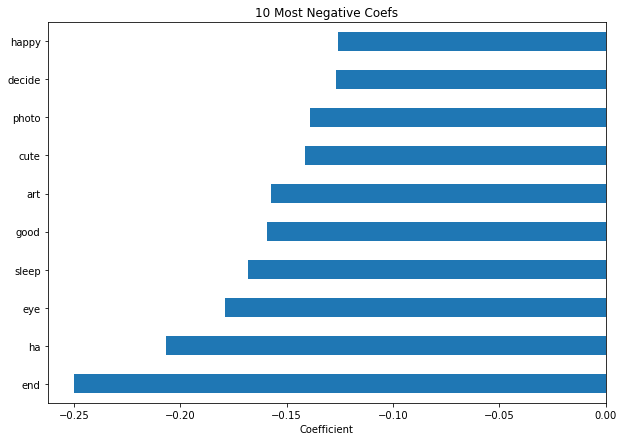

In [20]:
# look at 10 Most Negative Coefs
my_series = coef_list.sort_values()[:10]

fig, ax = plt.subplots(1,1,figsize = (10,7))
ax = my_series.plot(kind='barh', title = '10 Most Negative Coefs')
ax.set_xlabel('Coefficient');

**Observation** The presence of words like `russian`, `video`, and `return` are valid recommendations from this model. Avoiding words like `eye` and `sleep` are also valid recommendations.

However, due to the nature our TF-IDF vectorization of the corpus, the IDF of these words would need to be calculated in order to provide an interpretation that is more actionable than "use these words" or "don't use these words".

### Random Forest Modeling via GridSearch
In this phase, fit a GridSearchCV to find optimal parameters for our random forest

In [21]:
# initialize the params

rf_params = {
    # we want to see a range of n_estimators from the default 100 to increased
    # values of 250 and 500
    'n_estimators': [100,250,500],
    
    # Playing with max depth away from the default of None
    'max_depth': [5,10,None],
    
    # Playing with min_samples_split from the default of 2
    'min_samples_split': [2,5,10]
}

In [22]:
# intialize the gridsearch
rf_gridsearch=GridSearchCV(RandomForestClassifier(n_jobs = -1),
              rf_params,
              cv = 5,
              verbose = 1)

# fit the gridsearch
rf_gridsearch.fit(X_lemma_train,y_lemma_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [5, 10, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 250, 500]},
             verbose=1)

In [23]:
rf_gridsearch.best_score_

0.6917884433994504

In [24]:
rf_gridsearch.best_params_

{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}

Gridsearch has identified the best parameters for our Random Forest as using the default value for `max_depth`, the middle choice for `min_samples_split`, and the highest value for `n_estimators` in our param grid.

In [25]:
# initialize a random forest with our updated params
rf = RandomForestClassifier(n_estimators = 500,
                            max_depth = None,
                            min_samples_split = 5,
                            n_jobs = -1,
                            random_state = 21)

# score our rf
scores = cross_val_score(rf, X_lemma, y_lemma)
print_scores(scores)

Score: 0.71 +- 0.03     min: 0.69, max: 0.73


**Observation** Recall that our original Random Forest score before GridSearchCV was<br><br>
Score: 0.70 +- 0.02     min: 0.69, max: 0.72<br><br>
There has been some slight movement here

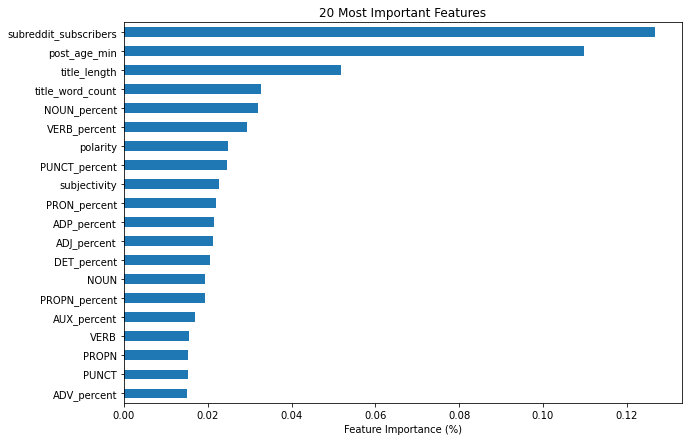

In [26]:
# fit rf to look at the most important features
rf.fit(X_lemma_train, y_lemma_train)

# look at the top 20 most important features
my_series = pd.Series(rf.feature_importances_, index = X_lemma.columns)\
    .sort_values(ascending = False)[:20].sort_values()

fig, ax = plt.subplots(1,1,figsize = (10,7))
ax = my_series.plot(kind='barh', title = '20 Most Important Features')
ax.set_xlabel('Feature Importance (%)');

**Observation** The percent values appear to be above their count amount counterpart. Remove them.

In [27]:
cols_to_drop = ['ADJ', 'ADP', 'ADV', 'AUX', 'CCONJ', 'DET'
                , 'INTJ', 'NOUN', 'NUM', 'PART', 'PRON'
                , 'PROPN', 'PUNCT', 'SCONJ', 'VERB']

X_lemma_adj = X_lemma.drop(cols_to_drop, axis=1)
X_lemma_adj_train = X_lemma_train.drop(cols_to_drop, axis=1)
X_lemma_adj_test = X_lemma_test.drop(cols_to_drop, axis=1)

In [28]:
# rerun our grid search
rf_gridsearch.fit(X_lemma_adj_train,y_lemma_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [5, 10, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 250, 500]},
             verbose=1)

In [29]:
rf_gridsearch.best_score_

0.6964950172925238

In [30]:
rf_gridsearch.best_params_

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}

Only one change of `min_samples_split` to value 10.

In [31]:
# initialize a random forest with our updated params
rf = RandomForestClassifier(n_estimators = 500,
                            max_depth = None,
                            min_samples_split = 10,
                            n_jobs = -1,
                            random_state = 21)

# fit our rf
scores = cross_val_score(rf, X_lemma_adj, y_lemma)
print_scores(scores)

Score: 0.71 +- 0.02     min: 0.70, max: 0.74


**Observation** We have improved our model's variability! 

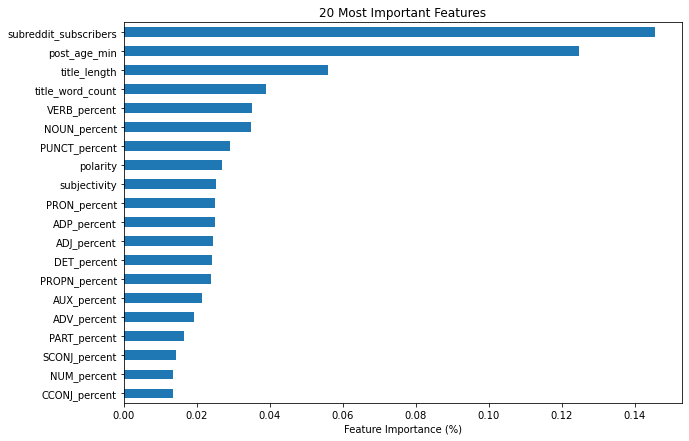

In [32]:
# fit rf to look at the most important features
rf.fit(X_lemma_adj_train, y_lemma_train)

# look at the top 20 most important features
my_series = pd.Series(rf.feature_importances_, index = X_lemma_adj.columns)\
    .sort_values(ascending = False)[:20].sort_values()

fig, ax = plt.subplots(1,1,figsize = (10,7))
ax = my_series.plot(kind='barh', title = '20 Most Important Features')
ax.set_xlabel('Feature Importance (%)');

**Observation** There do not appear to be any redundant features here

### Production Model Selection

After performing feature selection optimization on both `logit` and `random forest`, the final scores of both were:
  *  0.68 +- 0.02     min: 0.67, max: 0.70
  *  0.71 +- 0.02     min: 0.69, max: 0.73
  
The better scores are the first reason why **random forest** is our production model

Additionally, interpretation of the coefficients, which is normally a positive attribute of logistic regressions, are not as straightforward due to the TF-IDF values that show up in the highest and lowest coefficient lists.

Random forests do lack in the interpretability department and will only be able to make broad recommendations of which features are important; but, with logit not being much more interpretable in this situation, the edge still goes to random forests.

Lastly, random forests are excellent at dealing with outliers which were not aggressively tackled during EDA because of the observed nature of Reddit in general: a site that has large and small communities, long discussions and short discussions, all to extremes that required us to analyze variables using the log scale of num_comments.

### Investigate High Feature Importance Attributes

**Note** Random forests are a classification model that utilizes an assortment of Decision Tree Classifiers. Rather than there being one Decision Tree, there are, in our case, 500. Each of these takes a random selection of data from our train dataset as well as a random assortment of variables.

The result is an aggregated system of feature importances that allow the model to predict test data. However, since no one Decision Tree is the same in the Random Forest of 500, we are restricted to only feature importances rather than coefficients like in Linear Regression.

In this section, the distribution of high-importance features, as identified by our random forest model, will be examined against our target variable. These characteristics will help us provide recommendations on which direction to go on each feature if we want to improve the chances of an engaging Reddit post!

#### Examine `subreddit_subscribers`

In [33]:
# examine distributions of subreddit subscribers by target value
df_lemma.groupby('target').subreddit_subscribers.describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,4819.0,9.075587e+05,2.784150e+06,5381.0,105358.5,248789.0,657184.0,40814502.0
1,4732.0,3.256703e+06,6.647783e+06,8339.0,296483.0,808685.5,2413006.5,40854908.0


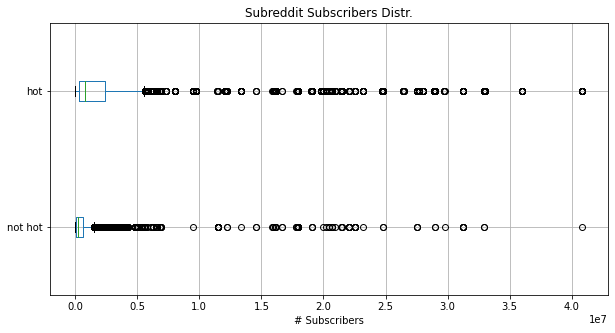

In [34]:
box = pd.DataFrame([df_lemma[df_lemma.target==0].subreddit_subscribers,
                    df_lemma[df_lemma.target==1].subreddit_subscribers],
                   index = ['not hot', 'hot']) 
box = box.T.boxplot(vert=False,)
box.set_title("Subreddit Subscribers Distr.")
box.set_xlabel("# Subscribers")
fig = plt.gcf()
fig.set_size_inches(10,5);

**Interpretation** Both subsets are right skewed with max values of 40M, but the value of the upper quartile for Not Hot being only 657K indicates that a significant amount of Not Hot posts are in these types of small subreddits (compare this to Hot's upper quartile of 2.4M).

This indicates that posts should at least be 2.4M in subscriber size to increase chances of post success. 

#### Examine `post_age_min`

In [35]:
df_lemma.groupby('target').post_age_min.describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,4819.0,403.134818,192.785002,22.599620,256.027083,374.260253,524.701175,1392.201954
1,4732.0,535.873496,238.865722,26.250978,358.681735,508.492529,690.353443,1426.258418


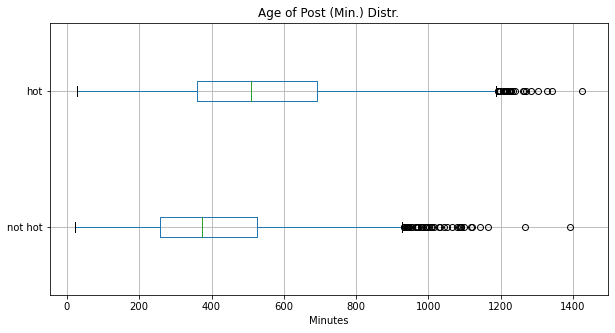

In [36]:
box = pd.DataFrame([df_lemma[df_lemma.target==0].post_age_min,
                    df_lemma[df_lemma.target==1].post_age_min],
                   index = ['not hot', 'hot']) 
box = box.T.boxplot(vert=False,)
box.set_title("Age of Post (Min.) Distr.")
box.set_xlabel("Minutes")
fig = plt.gcf()
fig.set_size_inches(10,5);

**Interpretation** Unlike the other variables, `post_age_min` isn't a controllable variable in that you cannot artificially increase a post's age. However, as Hot posts trend higher in `post_age_min`, it is recommended that 8 hours pass before determining if a post is *not* successful.

#### Examine `title_length`

In [37]:
df_lemma.groupby('target').title_length.describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,4819.0,41.960365,38.651763,1.0,18.5,31.0,53.0,300.0
1,4732.0,58.081150,50.405854,1.0,25.0,43.0,74.0,300.0


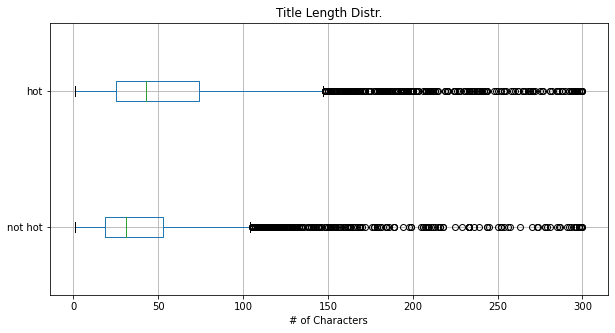

In [38]:
box = pd.DataFrame([df_lemma[df_lemma.target==0].title_length,
                    df_lemma[df_lemma.target==1].title_length],
                   index = ['not hot', 'hot']) 
box = box.T.boxplot(vert=False,)
box.set_title("Title Length Distr.")
box.set_xlabel("# of Characters")
fig = plt.gcf()
fig.set_size_inches(10,5);


**Interpretation** Hot posts have `title_lengths` trending upwards. This indicates that posts should be somewhat long and not rely on single words or emojis for titles.

#### Examine `VERB_percent`

In [39]:
df_lemma.groupby('target').VERB_percent.describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,4819.0,0.109071,0.136179,0.0,0.0,0.085714,0.166667,1.0
1,4732.0,0.120342,0.127516,0.0,0.0,0.111111,0.170517,1.0


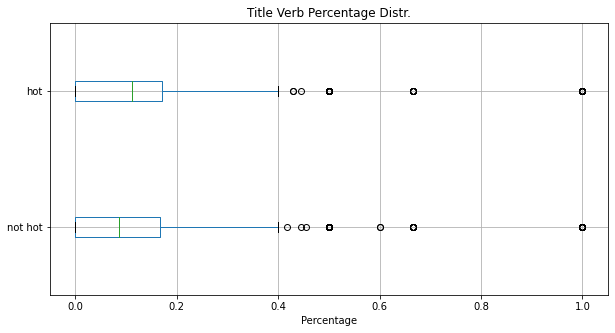

In [40]:
box = pd.DataFrame([df_lemma[df_lemma.target==0].VERB_percent,
                    df_lemma[df_lemma.target==1].VERB_percent],
                   index = ['not hot', 'hot']) 
box = box.T.boxplot(vert=False,)
box.set_title("Title Verb Percentage Distr.")
box.set_xlabel("Percentage")
fig = plt.gcf()
fig.set_size_inches(10,5);


**Interpretation** A key takeaway here is that there is upward pressure for Hot posts on the percent of Verbs in the title. Even though the upper quartile values are about even, the density of the Hot posts is still higher overall for percent of Verbs.

This indicates that maintaining a solid presence of verbs in the 10-12% range will help yield a better-performing post.

#### Examine `is_reddit_media_domain`

In [41]:
df_lemma.groupby('target').is_reddit_media_domain.describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,4819.0,0.841046,0.365671,0.0,1.0,1.0,1.0,1.0
1,4732.0,0.708580,0.454465,0.0,0.0,1.0,1.0,1.0


**Interpretation** Not Hot posts were on a reddit media domain more often than Hot posts. Both subsets have a median `is_reddit_media_domain` value of TRUE but the Not Hot posts are even more heavily weighted in that direction with the lower quartile point being a value of TRUE as well.

This indicates that there is opportunity on the side of *not* using a reddit media domain when it isn't convenient or necessary such as hosting videos on a different site or direct linking to the source site. A well-known complaint about reddit media domains are the video hosting.

## Confusion Matrices

In [42]:
predicted = rf.predict(X_lemma_adj_test)

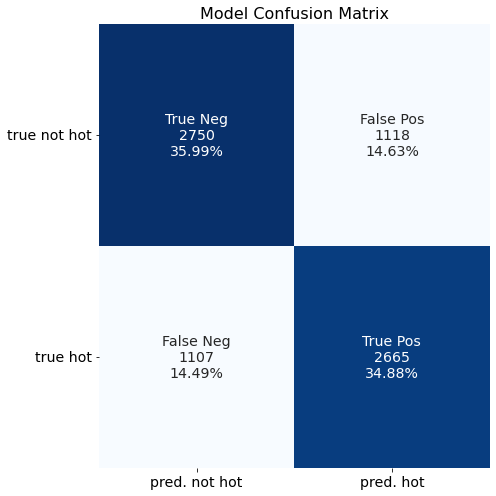

In [43]:
# https://www.tutorialspoint.com/how-to-hide-the-colorbar-of-a-seaborn-heatmap
# https://stackoverflow.com/questions/33104322/auto-adjust-font-size-in-seaborn-heatmap

cf_matrix = confusion_matrix(y_lemma_test, predicted)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]

group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)




chart = sns.heatmap(cf_matrix,
                    annot=labels,
                    annot_kws={"size": 20 / np.sqrt(len(cf_matrix))},
                    fmt='', cmap='Blues', cbar=False,
            xticklabels=['pred. not hot','pred. hot'],
            yticklabels=['true not hot', 'true hot'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=0,
                      fontsize = 20 / np.sqrt(len(cf_matrix)))
chart.set_yticklabels(chart.get_yticklabels(), rotation=0,
                      fontsize = 20 / np.sqrt(len(cf_matrix)))

chart.set_title("Model Confusion Matrix", fontsize=16)

fig = plt.gcf()
fig.set_size_inches(7,7)

plt.tight_layout()
plt.savefig('../images/confusion_matrix.png', transparent=True);

In [44]:
print(classification_report(y_lemma_test, predicted, digits = 4))

              precision    recall  f1-score   support

           0     0.7130    0.7110    0.7120      3868
           1     0.7045    0.7065    0.7055      3772

    accuracy                         0.7088      7640
   macro avg     0.7087    0.7087    0.7087      7640
weighted avg     0.7088    0.7088    0.7088      7640



In [45]:
%%html
<style>
table {float:left}
</style>

**The model performance on seen data:**

|Metric|Score|
|---|---|
|Accuracy|71.03%|
|Precision|70.45%|
|Recall|70.65%|
|Specificity|71.10%|
|F1|70.55%|

**Interpretation** The accuracy of the model is 71.03%. When it comes to putting resources behind a Reddit post with the intent to get traction, this being the most minimized block of the matrix is good indication for the model's usefulness. Especially against the baseline of 50%.

## Conclusion

At the high level, a few easy recommendations for getting an engaging Reddit post:
  1.  **Be Patient:**  Reddit takes the age of the post into account for Hot! Give the post around 8 hours to really rev up before making a final call on its success.
  2.  **Aim for large subreddits:**  More eyeballs means more possible commenters. Look 2.5M subscribers or more and pay attention to the submission guidelines and the meta of the subreddit.
  3.  **Action words:**  The percent of verbs in a title matters. Maintain a 10-12% ratio to keep things in a successful prose
  4.  **Avoid Short Titles:**  Single words or plain emojis are not proven winners
  5.  **Reddit Media Domains are not an absolute:**  They are convenient and useful, but not a one-size-fits-all. Select your domain with purpose.

By applying the above recommendations, a post is in a better position overall to be more engaging (aka have a greater than median number of comments!).

Possible future steps to move the project forward are to focus the model on specific subreddits, especially if a specific redditor-population is deemed more valuable than the average redditor. Another possible focus could be on the type of post trying to be submitted. There will be different pushes and pulls for a post that is a text blob, an image, a gif, a video, an article, etc. The more refined ask with the type of post the person is trying to make, the better the model could be trained to provide insights.

Another use of the model created here would be for any adjacent projects fivethirtyeight may have with regard to Reddit and its engaging posts. With the 71% accuracy, the model can be useful for flagging future posts as hot or not.